In [1]:
%run fungsi_save.ipynb

In [2]:
#pilih data fitur masukan NN1
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values
post = pd.read_csv('data_feature_multinnpso_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)
output_train_data = train_data[:,total_features+1] #output aja limfo
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
train_data

29


array([[0.23290321, 0.1880663 , 0.80561347, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.33876336, 0.21701657, 0.88720096, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.14477051, 0.07823204, 0.90193096, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.43478703, 0.29436464, 0.82699077, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.43482695, 0.20640884, 0.95507519, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.28595488, 0.25281768, 0.46894224, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [3]:
output_train_data

array([2, 1, 0, ..., 1, 2, 2])

In [4]:
np.size(train_data,axis=0)

1390

In [5]:
a = [] #index fitur yang gak kepake
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[0, 3, 4, 6, 9, 12, 16, 20, 27, 28]

In [6]:
train_data = np.delete(train_data, a ,axis=1) #data fitur yang udah terseleksi
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data[0])

Number of training samples is 1390
19
[0.1880663  0.80561347 0.21574129 0.17391968 0.28606383 0.19392608
 0.75829173 0.27244226 0.89808411 0.764981   0.59393149 0.61649561
 0.59072767 0.24770907 0.34098131 0.42035761 0.29014588 0.1609526
 0.71176292]


In [7]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features+1] #output aja untuk output 1
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi

#save_data1(test_data)

In [8]:
validasi_data.shape

(347, 19)

In [9]:
n_inputs = np.size(train_data,1)
n_hidden = 20
n_classes = 3
n_inputs

19

In [10]:
def forward_prop(params):

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = params[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = params[w1_total:b1_total].reshape((n_hidden,))
    W2 = params[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = params[w2_total:b2_total].reshape((n_classes,))

    # Perform forward propagation
    z1 = train_data.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1 #belum pasti pake fungsi aktivasi apa
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood #belum pasti loss functionnya pake apa
    N = len(train_data) # Number of samples
    corect_logprobs = -np.log(probs[range(N), output_train_data])
    loss = np.sum(corect_logprobs) / N
    return loss

In [11]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [12]:
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000) #fungsi verbose dan print step error


2021-04-06 14:30:38,131 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████|1000/1000, best_cost=0.59
2021-04-06 14:31:03,459 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 0.5897276960329841, best pos: [-0.03697134  1.2020089  -1.65798833  0.21925699 -0.98224056 -0.48127622
 -0.34228517  0.84693983  1.08398018 -0.66621565  0.33668343 -0.40413133
 -0.35356356 -0.02803368 -7.38974349 -0.89125799  0.41724374  0.29693225
  0.30428377  1.24152787  0.86292548  0.43205176  0.23463091 -0.87613341
  0.93437873  0.70080367  0.334182    0.99757618 -0.68244922 -0.5058682
 -0.54274834 -0.89497994  0.54557666  0.50098361  0.74511243  0.41362242
  0.79109263  1.04710556 -1.07173711  0.06576062  0.06976071 -0.35845482
 -2.23939744 -0.24097165  0.85209966  1.02448344 -0.70442359 -0.34541058
  0.09946755  0.41069584  0.5

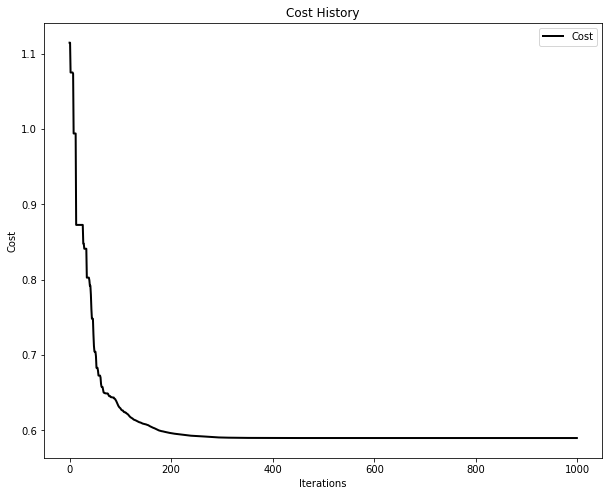

In [13]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [14]:
train_data.shape

(1390, 19)

In [15]:
np.savetxt('hyperparameter.csv', pos, delimiter=",")

In [16]:
#kurang test file
def predict(a, pos): #a = data training atau data test

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = pos[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = pos[w1_total:b1_total].reshape((n_hidden,))
    W2 = pos[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = pos[w2_total:b2_total].reshape((n_classes,))
    save_params2(W1,b1,W2,b2)
    # Perform forward propagation
    z1 = a.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # fungsi aktivasi belum fix
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [17]:
predict(validasi_data,pos)

array([1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,

In [18]:
cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
print(cm_train)
print(cm_validasi)

[[461  56  74]
 [ 74 196  53]
 [ 51  20 405]]
[[ 83  27  35]
 [  3  54  14]
 [  5   7 119]]


Normalized confusion matrix
[[0.78 0.09 0.13]
 [0.23 0.61 0.16]
 [0.11 0.04 0.85]]
Normalized confusion matrix
[[0.57 0.19 0.24]
 [0.04 0.76 0.2 ]
 [0.04 0.05 0.91]]


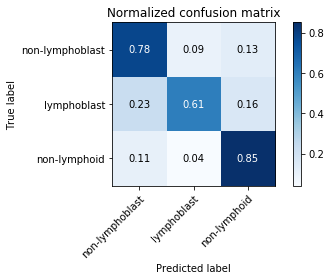

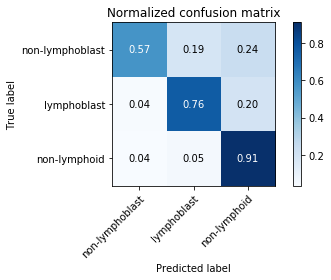

In [19]:
class_names = np.array(['non-lymphoblast',"lymphoblast","non-lymphoid"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, predict(train_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, predict(validasi_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [20]:
cm_t.figure.savefig('rev3_train2.png')
cm_v.figure.savefig('rev3_validasi2.png')

In [21]:
predict(train_data, pos)

array([2, 1, 0, ..., 2, 1, 2], dtype=int64)

In [22]:
predict(validasi_data, pos)

array([1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,

In [23]:
print("Presisi data training limfoblas : ", precision(1,cm_train))
print("Recall data training limfoblas (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoblas :  0.7205882352941176
Recall data training limfoblas (sensitivitas) :  0.6068111455108359
Presisi rerata data training :  0.7561852835260204
Presisi rerata data training :  0.7458951075309455
Akurasi data training :  0.7640287769784173
F1 Score data training :  0.7510049485062064


In [24]:
print("Presisi data validasi limfoblas : ", precision(1,cm_validasi))
print("Recall data validasi limfoblas : ", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoblas :  0.6136363636363636
Recall data validasi limfoblas :  0.7605633802816901
Presisi rerata data validasi :  0.7446858696858697
Presisi rerata data validasi :  0.7471247066500079
Akurasi data validasi :  0.7377521613832853
F1 Score data validasi :  0.7459032946421413


In [25]:
pos2 = [i for i in pos]
pos2

[-0.03697133507811547,
 1.2020088977938153,
 -1.657988332737816,
 0.2192569926300145,
 -0.9822405598613898,
 -0.48127621985497016,
 -0.34228517315358326,
 0.8469398287932823,
 1.0839801788158858,
 -0.6662156485666921,
 0.3366834330373064,
 -0.4041313299446863,
 -0.353563557610039,
 -0.028033677517234748,
 -7.389743486811375,
 -0.8912579909168272,
 0.41724373750208604,
 0.2969322479981509,
 0.3042837650069058,
 1.2415278726889463,
 0.8629254759732944,
 0.4320517602465672,
 0.23463090806438378,
 -0.8761334116553264,
 0.9343787278521991,
 0.7008036741526603,
 0.33418199934520043,
 0.9975761801430987,
 -0.6824492185202097,
 -0.5058682018424336,
 -0.5427483449042916,
 -0.8949799382436007,
 0.5455766579435911,
 0.5009836092255935,
 0.7451124323565933,
 0.4136224154395022,
 0.7910926324815154,
 1.0471055551691928,
 -1.0717371098398503,
 0.06576061953541962,
 0.0697607059183728,
 -0.35845482395167844,
 -2.2393974368307568,
 -0.24097164881660948,
 0.8520996593929377,
 1.0244834357058406,
 -0.70

In [26]:
#save_pos_step1('neuron_step1.csv',(n_hidden,optimizer.cost_history,accuracy(cm_train),accuracy(cm_validasi)))
save_pos_step1('perfo_step2.csv',("1",accuracy(cm_train),accuracy(cm_validasi),pos2,optimizer.cost_history,post))